In [1]:
# https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

!gdown --id 1W35olSMAhKGTxxMk8J_-5ZjPQVV94N4Y

Downloading...
From: https://drive.google.com/uc?id=1W35olSMAhKGTxxMk8J_-5ZjPQVV94N4Y
To: /content/AB_NYC_2019.csv
7.08MB [00:00, 22.5MB/s]


In [6]:
import pandas as pd
import seaborn as sns
from PIL import Image
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [10]:
HAPPY_COLORS_PALETTE = ['#01BEFE', '#FFDD00', '#FF7D00', '#FF006D', '#ADFF02', '#8F00FF']

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 6 

In [11]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [12]:
df.shape

(48895, 16)

(array([4.8597e+04, 1.8800e+02, 5.7000e+01, 1.8000e+01, 9.0000e+00,
        8.0000e+00, 7.0000e+00, 3.0000e+00, 2.0000e+00, 6.0000e+00]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <a list of 10 Patch objects>)

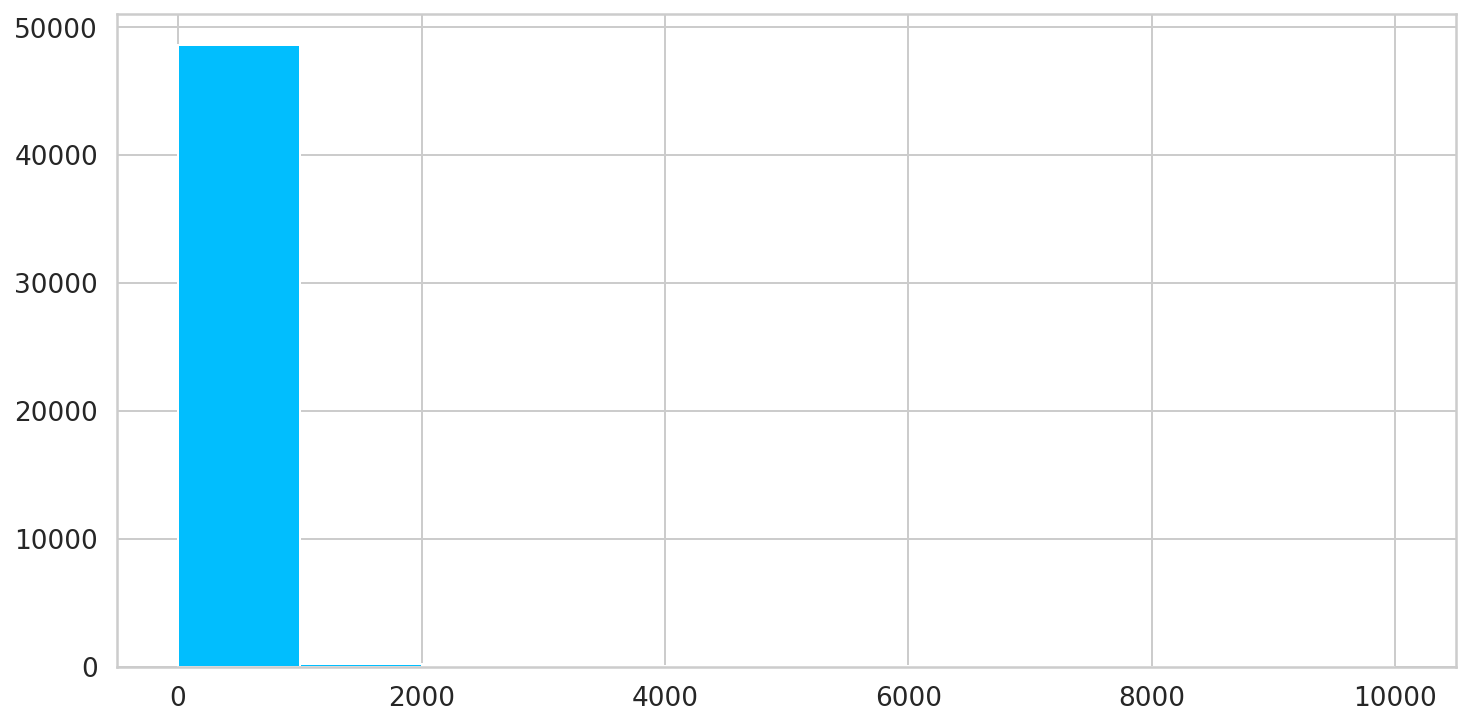

In [13]:
plt.hist(df.price)

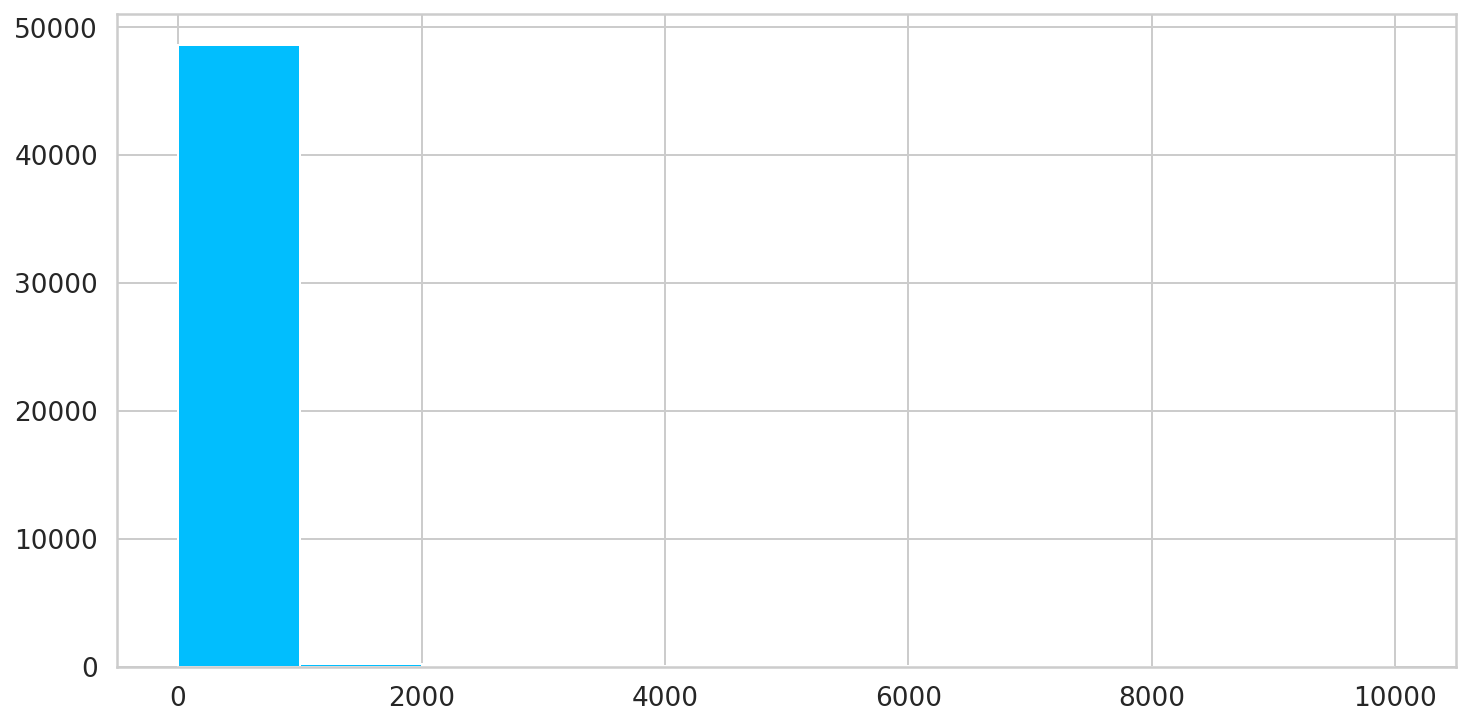

In [14]:
plt.hist(df.price);

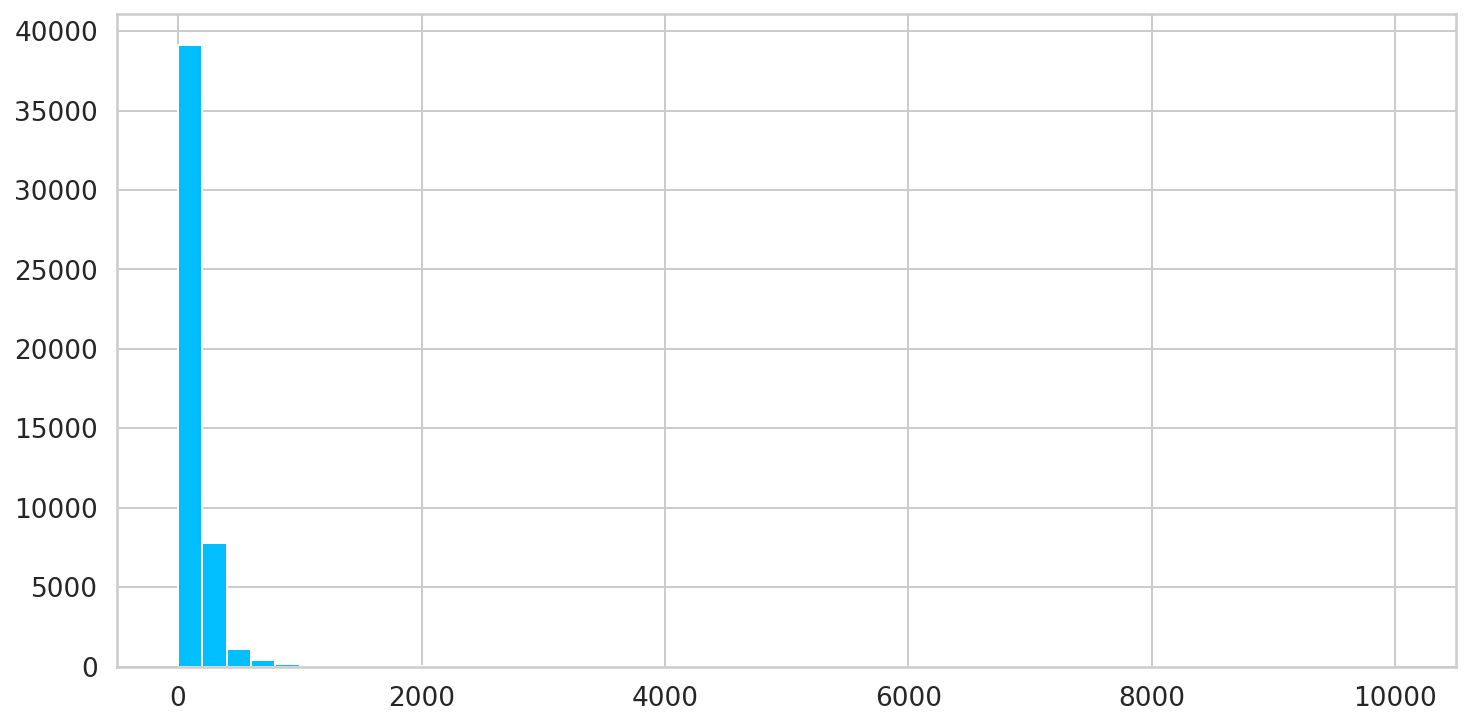

In [16]:
plt.hist(df.price, bins=50);

(0.0, 500.0)

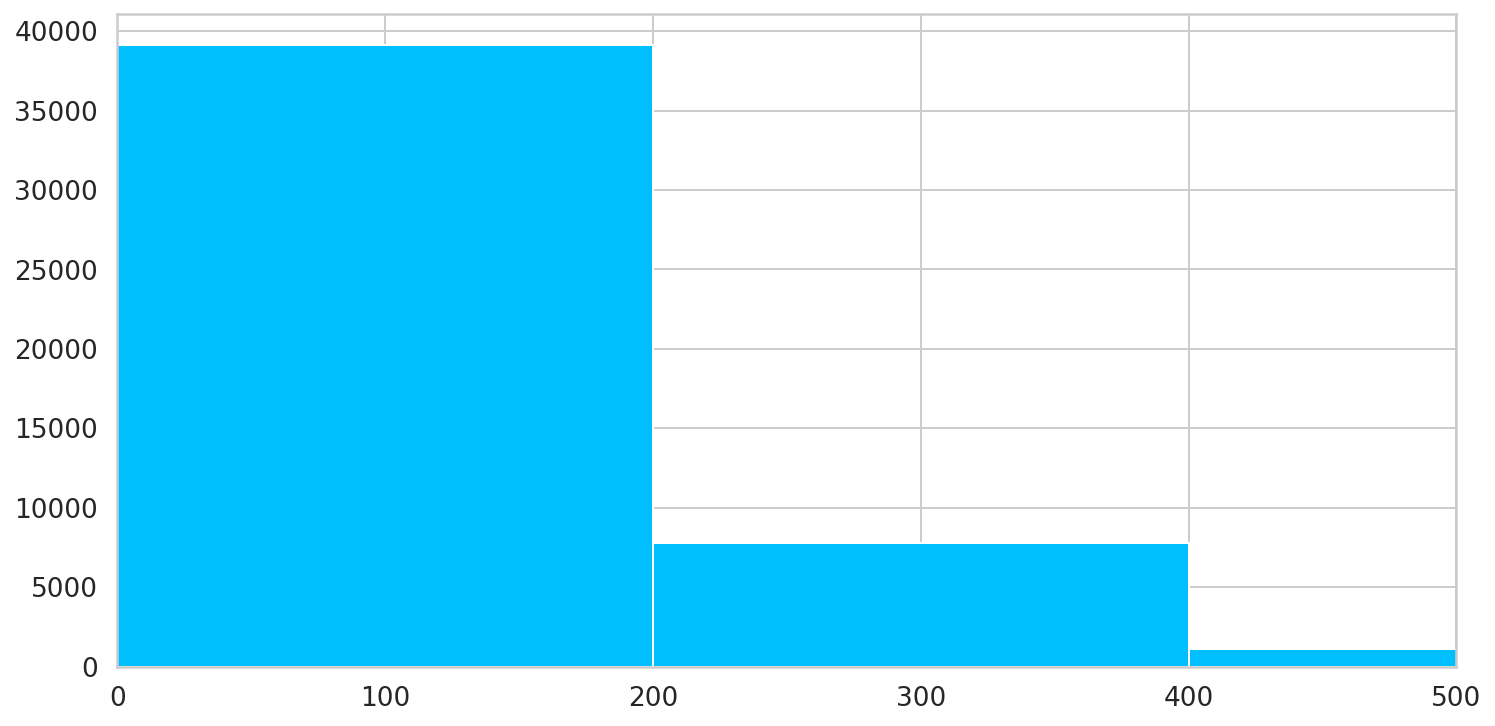

In [17]:
plt.hist(df.price, bins=50);
plt.xlim((0, 500))

Text(0, 0.5, 'Number of Properties')

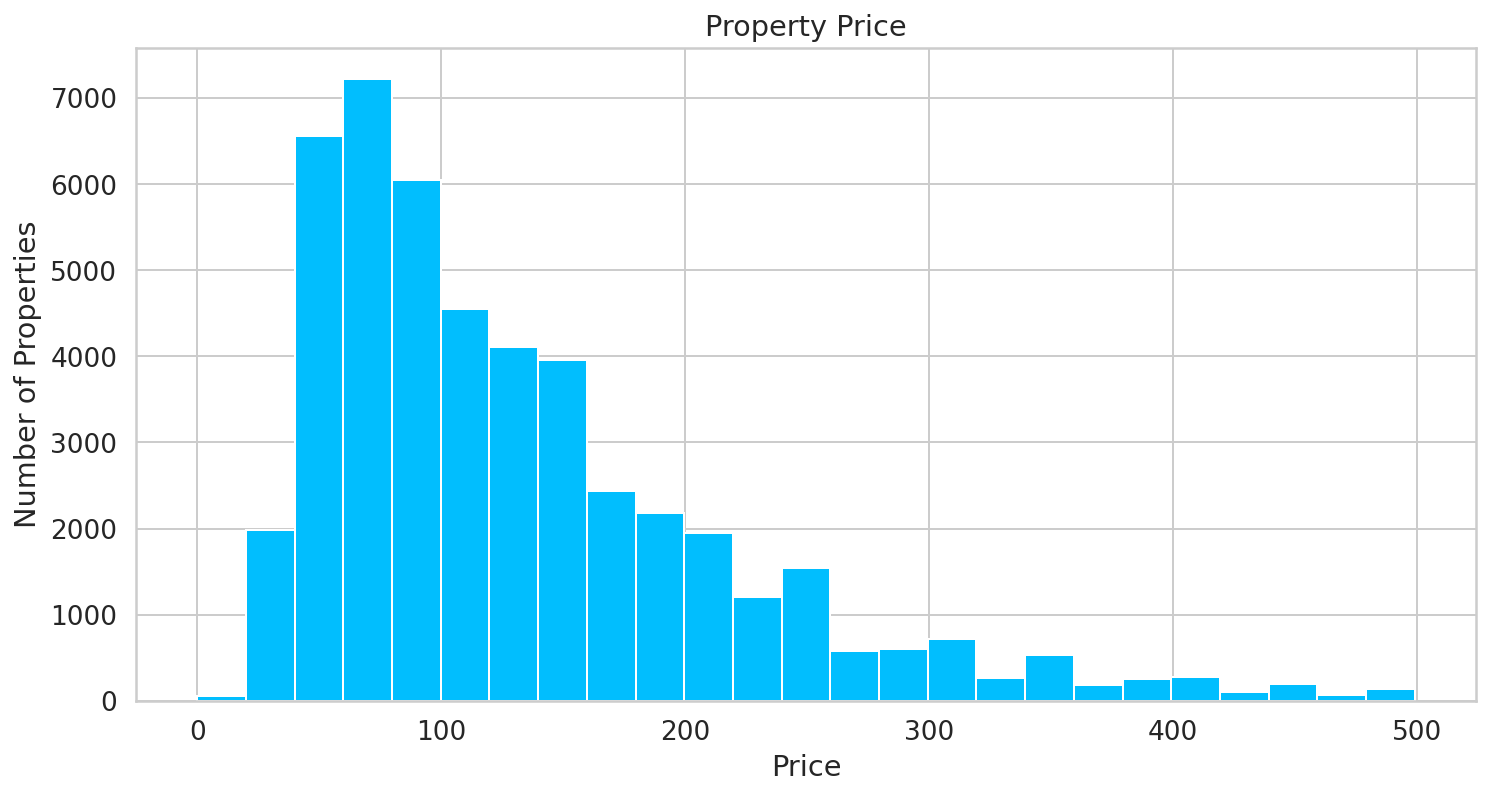

In [21]:
normal_price_df = df[df.price < 500]

plt.hist(normal_price_df.price, bins=25);
plt.title('Property Price')
plt.xlabel('Price')
plt.ylabel('Number of Properties')
#plt.xlim((0, 500))



Text(0, 0.5, 'Number of Properties')

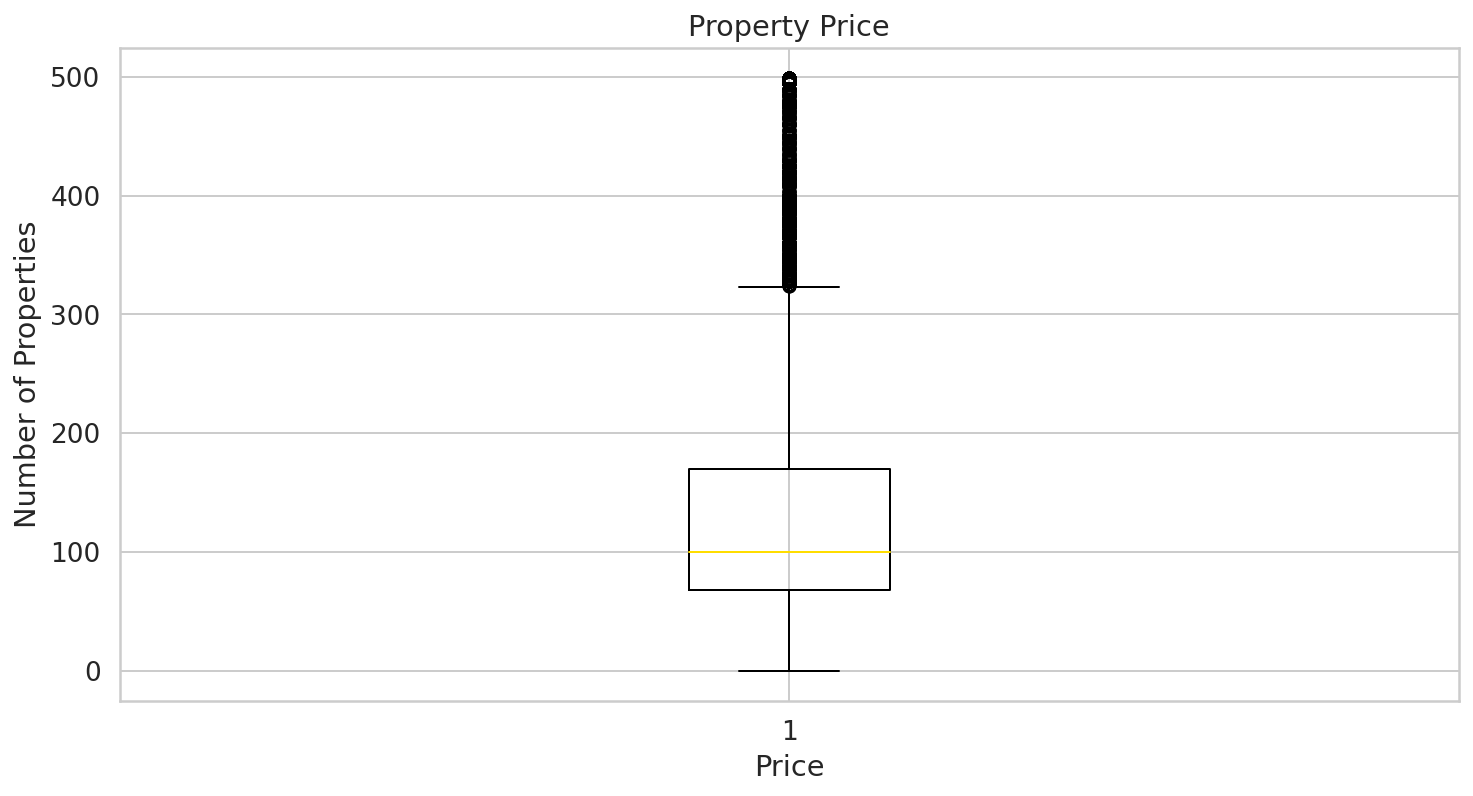

In [23]:
## Box Plot
plt.boxplot(normal_price_df.price);
plt.title('Property Price')
plt.xlabel('Price')
plt.ylabel('Number of Properties')

Violin Plot

Text(0, 0.5, 'Number of Properties')

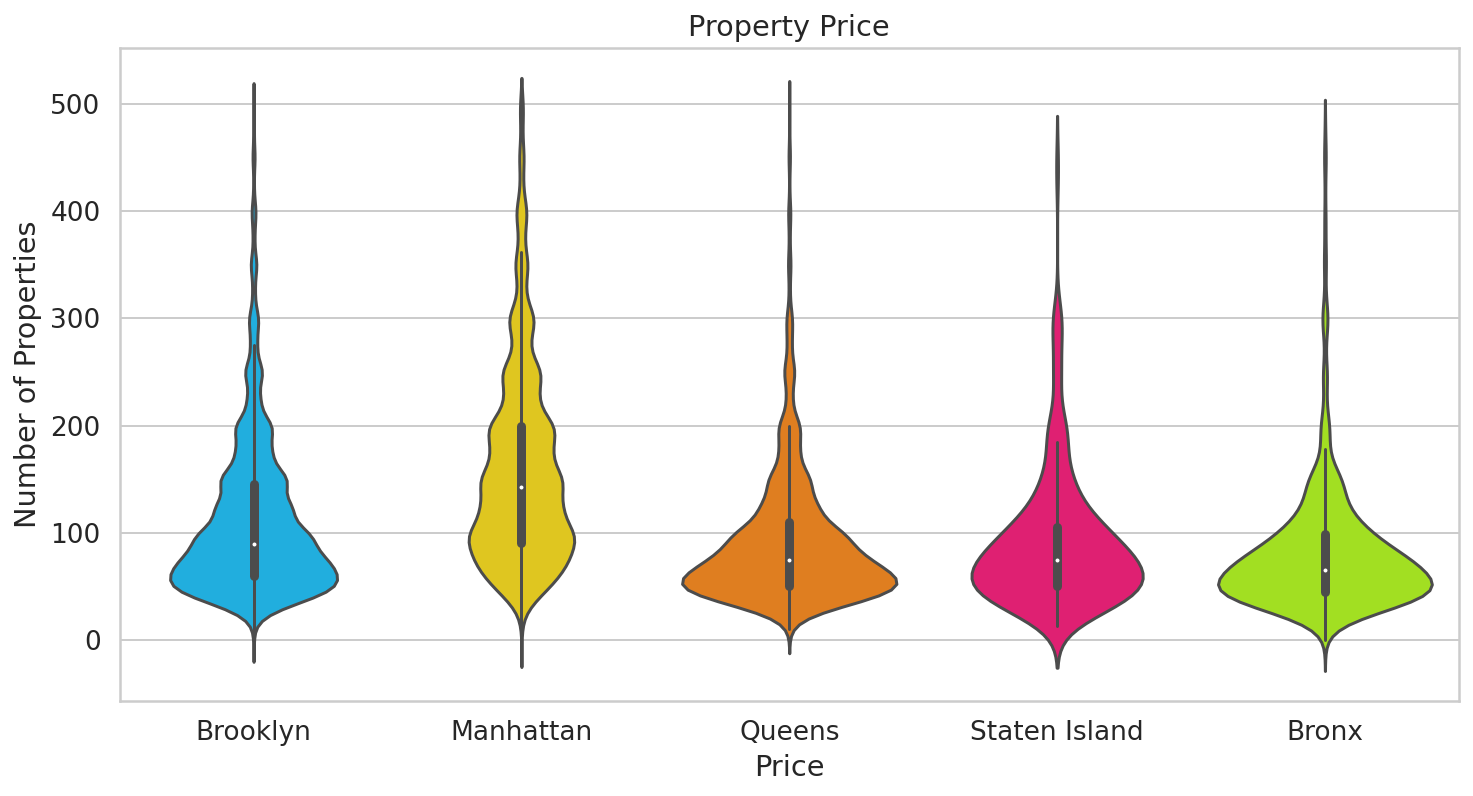

In [24]:
sns.violinplot(normal_price_df.neighbourhood_group, normal_price_df.price)
plt.title('Property Price per neightbourhood')
plt.xlabel('Price')
plt.ylabel('Number of Properties')

Text(0, 0.5, 'Number of Properties')

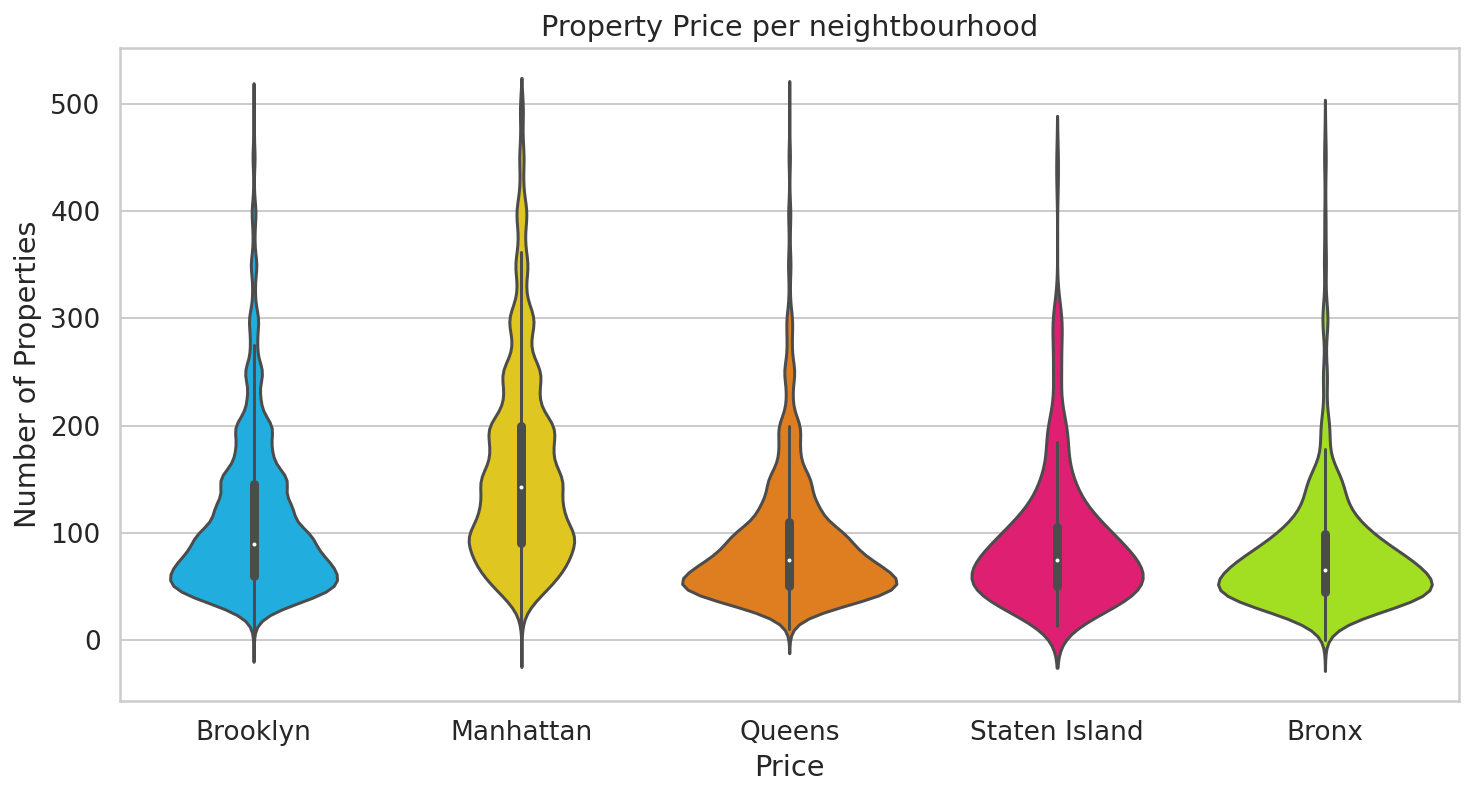

In [28]:
sns.violinplot(df.neighbourhood_group, normal_price_df.price);
plt.title('Property Price per neightbourhood')
plt.xlabel('Price')
plt.ylabel('Number of Properties')

Bar Chart

Text(0, 0.5, 'Number of Properties')

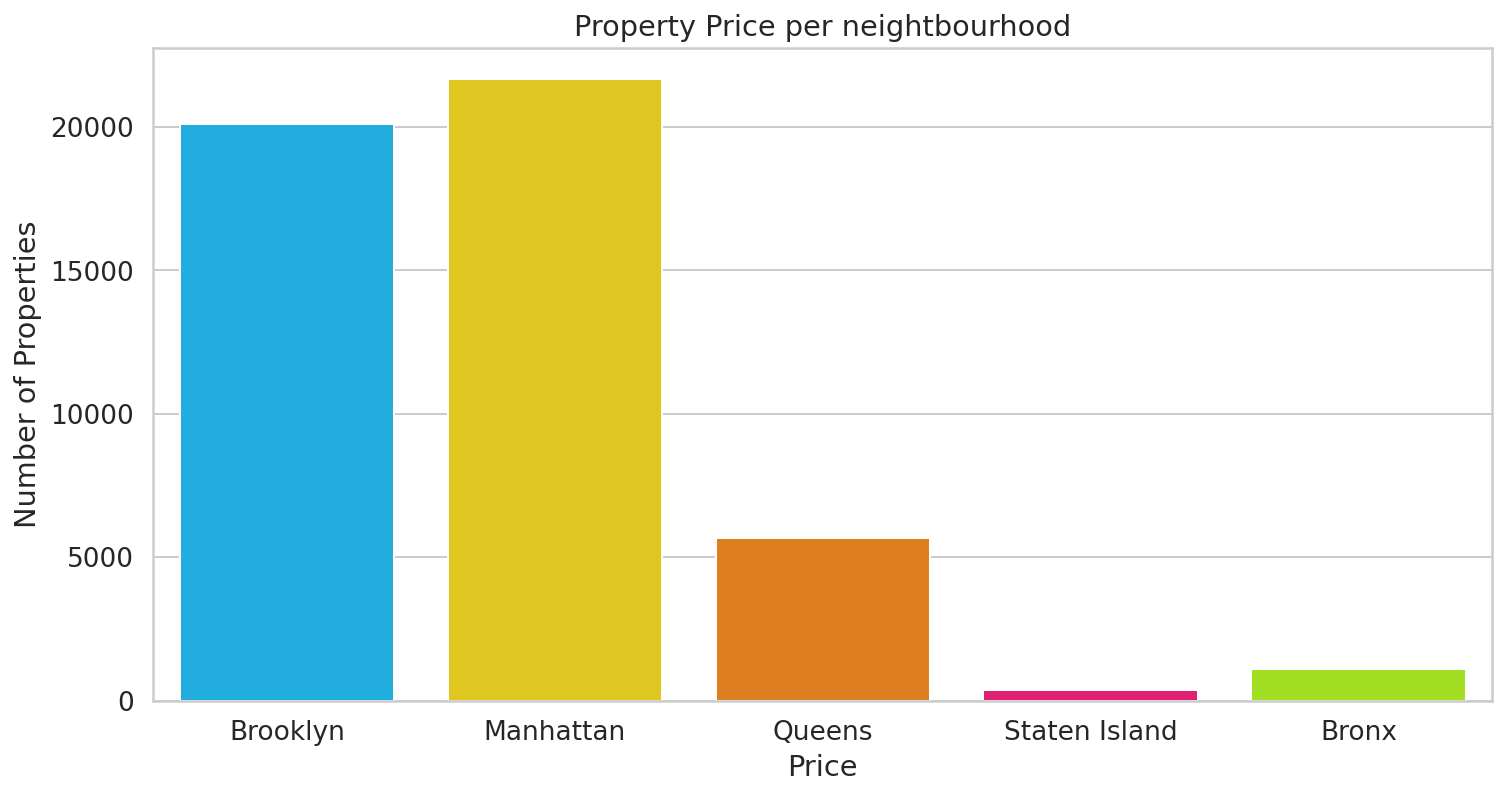

In [26]:
sns.countplot(df.neighbourhood_group)
plt.title('Property Price per neightbourhood')
plt.xlabel('Price')
plt.ylabel('Number of Properties')

Line Chart

Text(0, 0.5, 'Number of Properties')

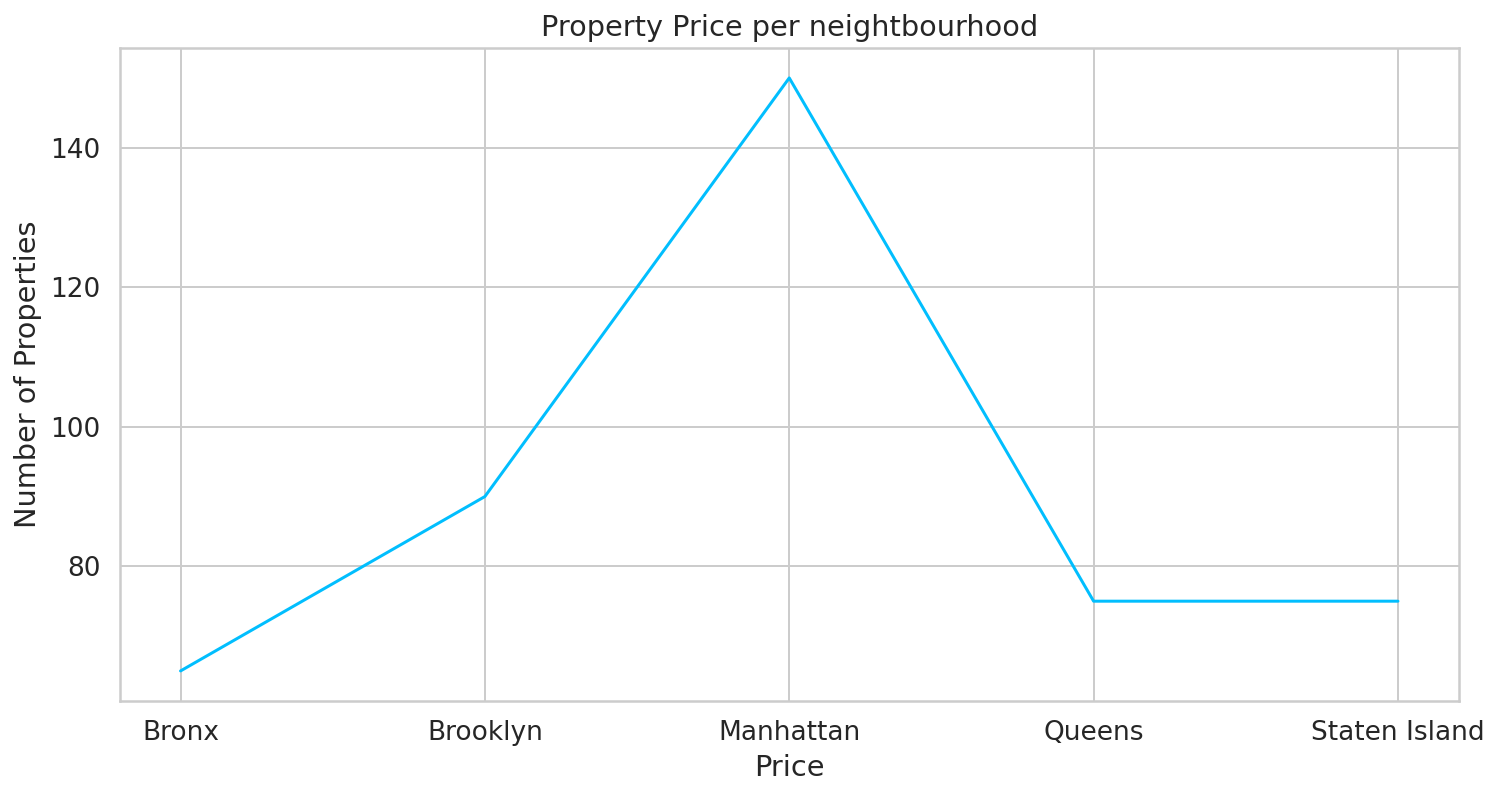

In [30]:
price_median = df.groupby('neighbourhood_group').price.median()
plt.plot(price_median)
plt.title('Property Price per neightbourhood')
plt.xlabel('Price')
plt.ylabel('Number of Properties')

Scatter Plot

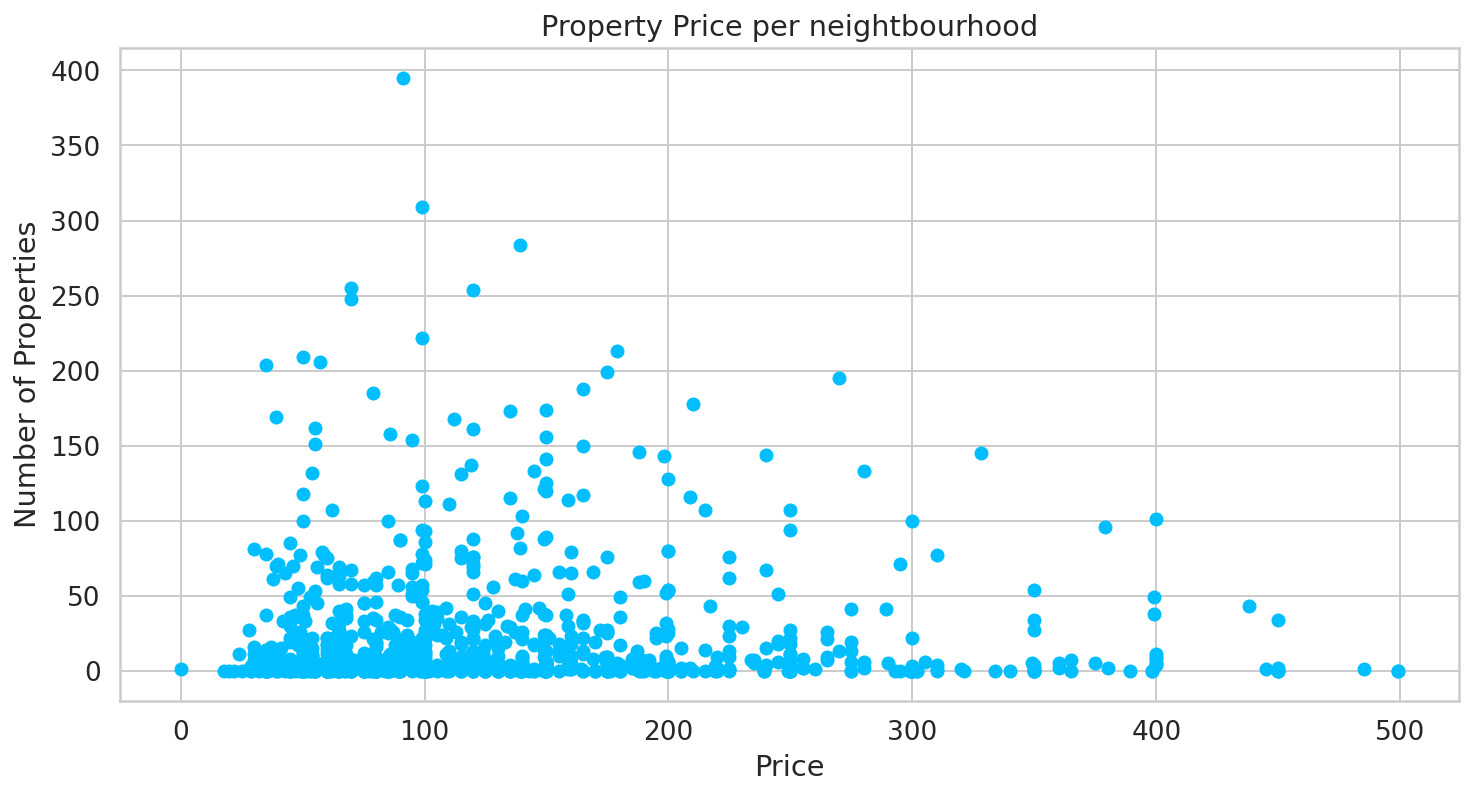

In [35]:
from scipy.stats import gaussian_kde

sample_df = normal_price_df.sample(n=1000)
plt.scatter(x=sample_df.price, y=sample_df.number_of_reviews)
plt.title('Property Price per neightbourhood')
plt.xlabel('Price')
plt.ylabel('Number of Properties');

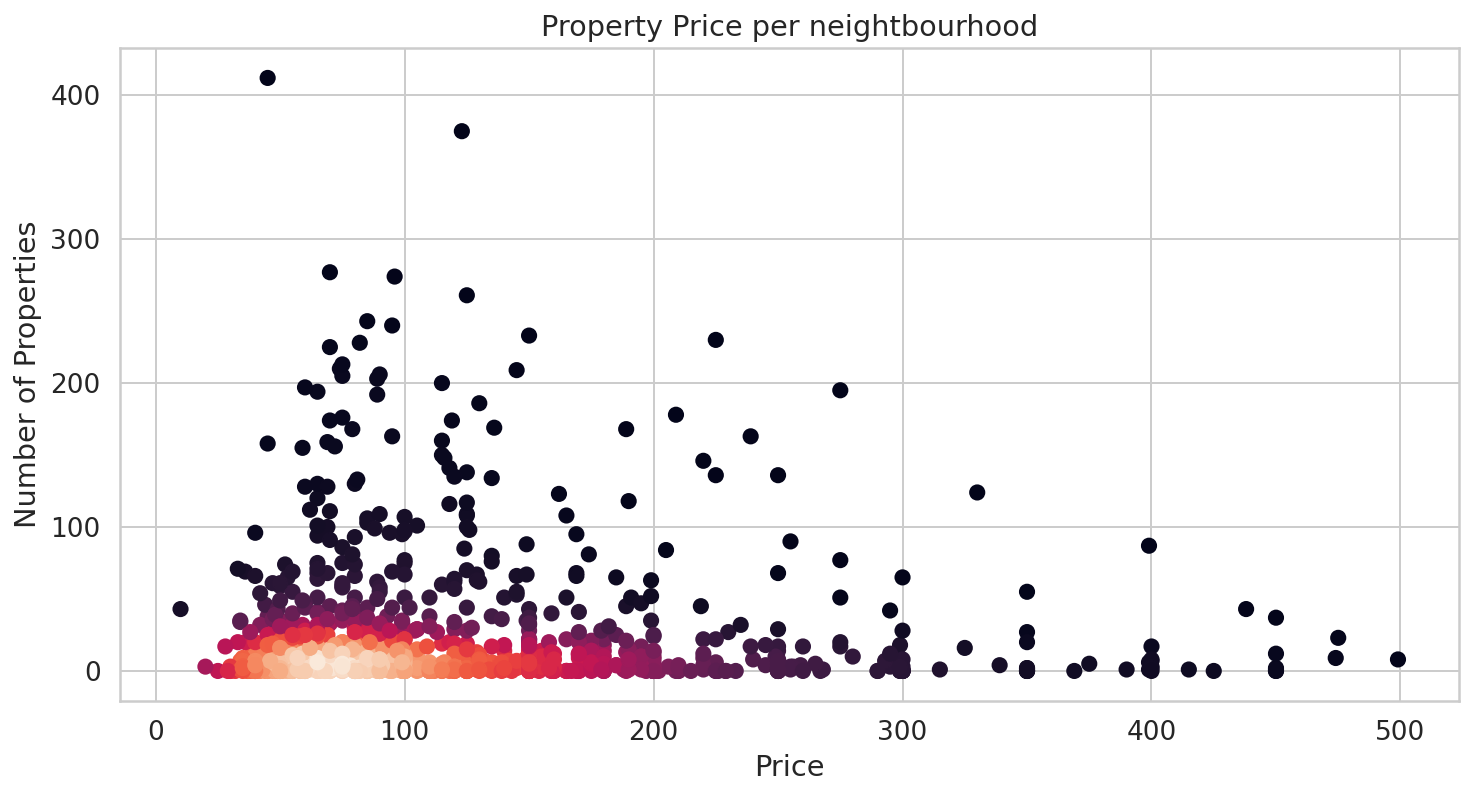

In [38]:
from scipy.stats import gaussian_kde
import numpy as np

sample_df = normal_price_df.sample(n=1000)
xy = np.vstack([sample_df.price, sample_df.number_of_reviews])
z = gaussian_kde(xy)(xy)

plt.scatter(x=sample_df.price, y=sample_df.number_of_reviews, c=z, s= 50)
plt.title('Property Price per neightbourhood')
plt.xlabel('Price')
plt.ylabel('Number of Properties');

Stacker Bar Plot

In [40]:
df_plot = df.groupby(['room_type', 'neighbourhood_group'])\
  .size().reset_index()\
  .pivot(columns='room_type', index='neighbourhood_group', values=0)


In [41]:
df_plot

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


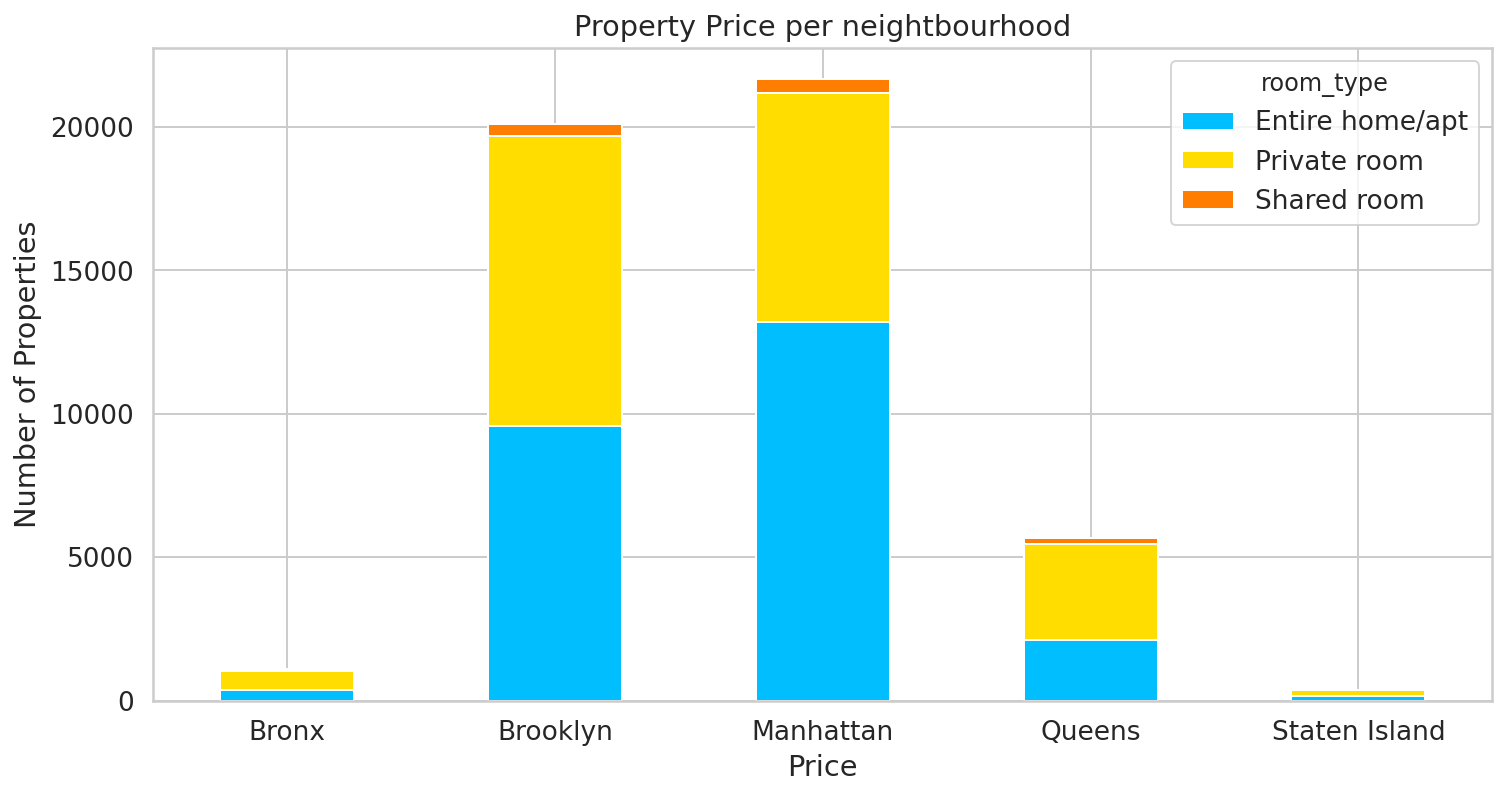

In [49]:
df_plot.plot.bar(stacked=True, rot=0)
plt.title('Property Price per neightbourhood')
plt.xlabel('Price')

plt.ylabel('Number of Properties')
plt.savefig('plot.jpg');

## Showing an Image

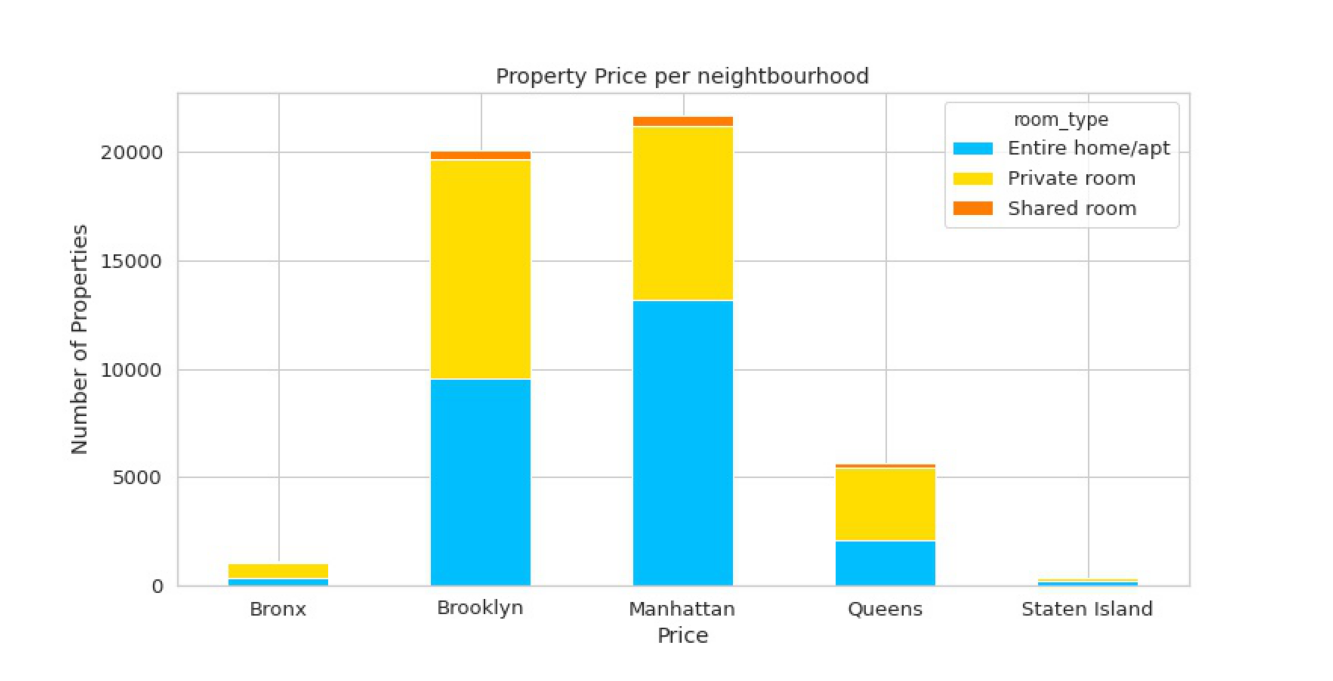

In [52]:
#plt.savefig('plot.jpg')
img = Image.open('plot.jpg')
plt.imshow(img)
plt.axis('off');
